# Overview:
Imported data from the previous step and conducted analysis to make forest plot.


# Steps:
1. Import data
2. Conduct analysis
    * using the `metafor` package
    * using the `rma` random effects model function
    * provided the overall effect size, 
    * heterogeneity, and p-value
3. Make forest plot

In [2]:
# read in the processed data from the previous notebook
data <- read.csv("processed-data.csv")

# show the first few rows of the data
head(data)

,n,study_id,odds_ratio,lower_ci,upper_ci
,<int>,<chr>,<dbl>,<dbl>,<dbl>
1,1216,"Di Luccia, 2010",3.0400000,1.22,7.57
2,77518,"Brewster, 2010",0.2857143,0.17,5.04
3,77518,"Brewster, 2010",0.1000000,0.00,3.11
4,89,"Cnattingius, 1995",7.5000000,1.80,31.90
5,342172,"Bugaiaki-Shaked, 2022",1.3300000,0.95,1.84
6,342172,"Bugaiaki-Shaked, 2022",1.0900000,0.92,1.30


In [4]:
library(metafor)

# create a meta-analysis object
result <- rma(yi = log(data$odds_ratio), 
                sei = log(data$upper_ci - data$lower_ci)/2, 
                method = "DL")

# Summarize the results
cat("The overall effect size (odds ratio) is", 
    exp(result$b), "with 95% confidence interval (", 
    exp(result$b - 1.96 * result$se), ", ",
    exp(result$b + 1.96 * result$se), ")\n")

Loading required package: Matrix

Loading required package: metadat


Loading the 'metafor' package (version 3.8-1). For an
introduction to the package please type: help(metafor)




The overall effect size (odds ratio) is 0.3719884 with 95% confidence interval ( 0.2364234 ,  0.5852864 )


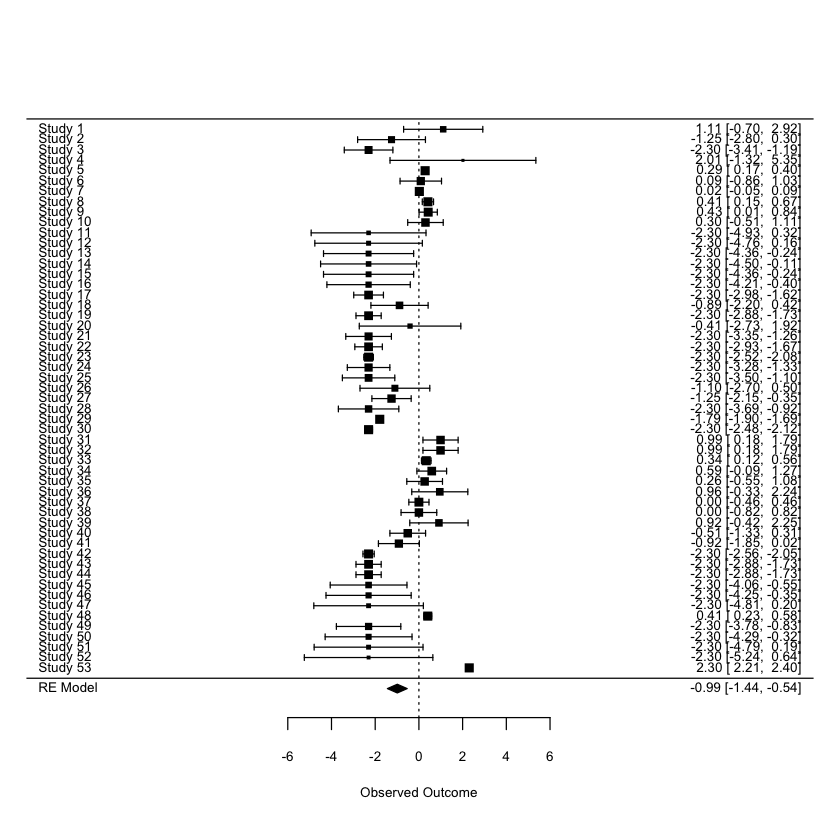

In [7]:
# Plot the forest plot
forest(result)